Hi everyone! I am a sophomore on winter break and I decided to try out this dataset. It is my first submission and I expect many errors and inefficient choices but that's okay!

For Kaggle's Season 4 Episode 12 challenge, we look at an insurance dataset. This dataset contains information about insurance policies, including demographic, financial, and behavioral data related to policyholders. It has been collected and made available for the purpose of predictive modeling, particularly to forecast premium amounts based on various features such as age, income, health score, and insurance history.

The main objective of this dataset is to predict premium amounts for insurance policies, which is a regression task. By analyzing the relationship between the features (e.g., age, income, health score) and the target variable (premium amount), it can help insurance companies better understand their customers and make data-driven pricing decisions.

The dataset consists of the following key features:
    Age: The age of the policyholder (numeric).
    Annual Income: The annual income of the policyholder (numeric).
    Credit Score: A score representing the creditworthiness of the policyholder (numeric).
    Health Score: A score representing the health status of the policyholder (numeric).
    Insurance Duration: The length of time the policyholder has been with the insurance provider (numeric).
    Policy Start Date: The date when the policy started (date).
    Policy Type: The type of insurance policy (categorical).
    Region: The region or location of the policyholder (categorical).
    Premium Amount: The target variable representing the amount of the insurance premium (numeric).

The dataset has undergone several preprocessing steps to ensure it is suitable for analysis:
    Missing Data: Missing values in features were handled through imputation using the most frequent value for categorical columns and the mean for numeric columns.
    One-Hot Encoding: Categorical features, including Policy Type and Region, were one-hot encoded to facilitate machine learning models.
    Target Variable: The target variable, Premium Amount, was separated from the features to be used for prediction.

The dataset consists of 1,200,000 rows and 19 columns, with 960,000 rows used for training and 240,000 rows for validation.

This dataset could be used to build machine learning models for pricing insurance policies, detecting fraudulent claims, or identifying risk factors associated with certain policyholder demographics. It also has applications in customer segmentation and predictive analytics for insurance companies

In [55]:
# imported modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import root_mean_squared_log_error
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
#read the files
test_data = pd.read_csv('/Users/hectar/Downloads/Playground Series S4E12/test.csv', index_col='id')
train_data = pd.read_csv('/Users/hectar/Downloads/Playground Series S4E12/train.csv', index_col='id')

print(f"Shape is: {train_data.shape}")

train_data.head()

Shape is: (1200000, 20)


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
#Frequency of NaN values in training data
train_data.isna().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [4]:
#Descriptive stats
train_data_summary = train_data.describe()
print(train_data_summary)

                Age  Annual Income  Number of Dependents  Health Score  \
count  1.181295e+06   1.155051e+06          1.090328e+06  1.125924e+06   
mean   4.114556e+01   3.274522e+04          2.009934e+00  2.561391e+01   
std    1.353995e+01   3.217951e+04          1.417338e+00  1.220346e+01   
min    1.800000e+01   1.000000e+00          0.000000e+00  2.012237e+00   
25%    3.000000e+01   8.001000e+03          1.000000e+00  1.591896e+01   
50%    4.100000e+01   2.391100e+04          2.000000e+00  2.457865e+01   
75%    5.300000e+01   4.463400e+04          3.000000e+00  3.452721e+01   
max    6.400000e+01   1.499970e+05          4.000000e+00  5.897591e+01   

       Previous Claims   Vehicle Age  Credit Score  Insurance Duration  \
count    835971.000000  1.199994e+06  1.062118e+06        1.199999e+06   
mean          1.002689  9.569889e+00  5.929244e+02        5.018219e+00   
std           0.982840  5.776189e+00  1.499819e+02        2.594331e+00   
min           0.000000  0.000000e+00 

In [5]:
#Frequency of NaN values in testing data
test_data.isna().sum()

Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [6]:
#Descriptive statistics for test data
test_data_summary = test_data.describe()
print(test_data_summary)

                 Age  Annual Income  Number of Dependents   Health Score  \
count  787511.000000  770140.000000         726870.000000  750551.000000   
mean       41.136440   32803.871471              2.009337      25.613036   
std        13.537829   32201.063749              1.415241      12.206882   
min        18.000000       2.000000              0.000000       1.646561   
25%        30.000000    8048.000000              1.000000      15.917353   
50%        41.000000   23981.000000              2.000000      24.580164   
75%        53.000000   44660.000000              3.000000      34.517766   
max        64.000000  149997.000000              4.000000      57.957351   

       Previous Claims    Vehicle Age   Credit Score  Insurance Duration  
count    557198.000000  799997.000000  708549.000000       799998.000000  
mean          1.004873       9.571891     592.904749            5.018949  
std           0.982803       5.772200     150.116374            2.593759  
min           0

In [7]:
#Data types 
print(train_data.dtypes)

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object


In [8]:
#removing rows without the target value 
train_data.dropna(axis=0, subset="Premium Amount", inplace=True)
y = train_data['Premium Amount']

train_data.drop(['Premium Amount'], axis=1, inplace=True)

#Breaking off the validation from training data

train_data, valid_data, y_train, y_valid = train_test_split(
    train_data, y, test_size=0.2, train_size=0.8, random_state=0)

In [23]:
#using imputation for missing values
my_imputer = SimpleImputer(strategy="most_frequent")

train_data_imputed = pd.DataFrame(my_imputer.fit_transform(train_data), columns=train_data.columns)
valid_data_imputed = pd.DataFrame(my_imputer.transform(valid_data), columns=test_data.columns)

print(train_data_imputed.shape)
print(valid_data_imputed.shape)
print(y_train.shape)

(960000, 19)
(240000, 19)
(960000,)


In [10]:
#separating the numerical from categorical columns
num_cols = train_data.select_dtypes(include=['float64', 'int64'])
cat_cols = train_data.select_dtypes(include=['object'])

num_cols_list = num_cols.columns.to_list()
cat_cols_list = cat_cols.columns.to_list()

print("----Categorical Columns----")
for col in cat_cols:
    print(col)

print("----Numerical Columns----")
for col in num_cols:
    print(col)

----Categorical Columns----
Gender
Marital Status
Education Level
Occupation
Location
Policy Type
Policy Start Date
Customer Feedback
Smoking Status
Exercise Frequency
Property Type
----Numerical Columns----
Age
Annual Income
Number of Dependents
Health Score
Previous Claims
Vehicle Age
Credit Score
Insurance Duration


In [11]:
# Check if cat_cols contains valid columns in train_data
print(train_data[cat_cols_list].head())

        Gender Marital Status Education Level  Occupation Location  \
id                                                                   
137672    Male       Divorced             PhD  Unemployed    Urban   
786837    Male       Divorced        Master's  Unemployed    Rural   
559710    Male         Single             PhD    Employed    Rural   
127788    Male        Married        Master's  Unemployed    Urban   
244109  Female       Divorced     High School    Employed    Rural   

       Policy Type           Policy Start Date Customer Feedback  \
id                                                                 
137672       Basic  2020-06-10 15:21:39.148733           Average   
786837     Premium  2019-09-21 15:21:39.272456              Good   
559710       Basic  2023-07-08 15:21:39.131192               NaN   
127788       Basic  2020-08-14 15:21:39.244069              Good   
244109     Premium  2020-08-23 15:21:39.147735              Poor   

       Smoking Status Exercise F

In [12]:
# One-hot encoding on the training and validation sets
# For training data

cat_list_without_date_train = [col for col in cat_cols_list if col not in ['Policy Start Date']]
OH_cat_col_train = pd.get_dummies(train_data[cat_list_without_date_train], drop_first=True)
OH_num_col_train = train_data[num_cols_list]
OH_train_data = pd.concat([OH_cat_col_train, OH_num_col_train], axis=1)


# For validation data
OH_cat_col_valid = pd.get_dummies(valid_data[cat_list_without_date_train], drop_first=True)
OH_num_col_valid = valid_data[num_cols_list]
OH_valid_data = pd.concat([OH_cat_col_valid, OH_num_col_valid], axis=1)

# Now you can check the shapes
print(OH_train_data.shape, OH_valid_data.shape, y_train.shape, y_valid.shape)


(960000, 28) (240000, 28) (960000,) (240000,)


In [13]:
print(train_data.dtypes)

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
dtype: object


In [14]:
#finding low and high cardinality category columns
low_cardinality_cols = [col for col in cat_cols_list if train_data_imputed[col].nunique() < 5]
print(f"Low cardinality columns: {low_cardinality_cols}")

high_cardinality_cols = [col for col in cat_cols_list if train_data_imputed[col].nunique() > 5]
print(f"High cardinality columns: {high_cardinality_cols}")

Low cardinality columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
High cardinality columns: ['Policy Start Date']


In [15]:
train_data_imputed.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [16]:
high_cardinality_cols = ['Policy Start Date']

# xxtract useful features from date columns
for date_col in high_cardinality_cols:
    if date_col != 'Policy Start Date':
        train_data_imputed[date_col] = pd.to_datetime(train_data_imputed[date_col])  # Convert to datetime if not already
        train_data_imputed[date_col + '_year'] =  train_data_imputed[date_col].dt.year
        train_data_imputed[date_col + '_month'] = train_data_imputed[date_col].dt.month
        train_data_imputed[date_col + '_day'] =   train_data_imputed[date_col].dt.day
        train_data_imputed[date_col + '_day_of_week'] =   train_data_imputed[date_col].dt.dayofweek
        train_data_imputed[date_col + '_week_of_year'] =  train_data_imputed[date_col].dt.isocalendar().week
        train_data_imputed[date_col + '_quarter'] =   train_data_imputed[date_col].dt.quarter
        train_data_imputed.drop(columns=[date_col], inplace=True)  # Drop the original date column


In [17]:
# one_hot_encoding for training data
cat_list_without_date_train = [col for col in cat_cols_list if col not in ['Policy Start Date']]

OH_cat_col = pd.get_dummies(train_data_imputed[cat_list_without_date_train], drop_first=True)

OH_num_col = train_data_imputed[num_cols_list]

OH_train_data = pd.concat([OH_cat_col, OH_num_col], axis=1)

print(OH_train_data.shape)
OH_cat_col.head(2)

(960000, 28)


,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,True,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False
1,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False


In [18]:
# Step 1: Impute missing values for validation data (if applicable)
# Assuming `valid_data_imputed` is your imputed validation dataset, similar to `train_data_imputed`
valid_data_imputed = valid_data.copy()  # Or use imputation steps like before if needed

# Apply imputation to validation data (if you used a strategy for missing values)
# Example using SimpleImputer:
# imputer = SimpleImputer(strategy='mean')
# valid_data_imputed[num_cols_list] = imputer.fit_transform(valid_data_imputed[num_cols_list])

# Step 2: One-hot encoding for training data
cat_list_without_date_train = [col for col in cat_cols_list if col not in ['Policy Start Date']]

OH_cat_col_train = pd.get_dummies(train_data_imputed[cat_list_without_date_train], drop_first=True)
OH_num_col_train = train_data_imputed[num_cols_list]
OH_train_data = pd.concat([OH_cat_col_train, OH_num_col_train], axis=1)

# Step 3: One-hot encoding for validation data (using imputed data)
OH_cat_col_valid = pd.get_dummies(valid_data_imputed[cat_list_without_date_train], drop_first=True)
OH_num_col_valid = valid_data_imputed[num_cols_list]
OH_valid_data = pd.concat([OH_cat_col_valid, OH_num_col_valid], axis=1)

# Now you can check the shapes
print(OH_train_data.shape, OH_valid_data.shape, y_train.shape, y_valid.shape)


(960000, 28) (240000, 28) (960000,) (240000,)


In [19]:
# one_hot_encoding for validation data
valid_data_imputed = pd.DataFrame(valid_data)

cat_list_without_date_valid = [col for col in cat_cols_list if col not in ['Policy Start Date']]

OH_cat_col_valid = pd.get_dummies(valid_data_imputed[cat_list_without_date_valid], drop_first=True)

OH_num_col_valid = valid_data_imputed[num_cols_list]

OH_valid_data = pd.concat([OH_cat_col_valid, OH_num_col_valid], axis=1)

print(OH_train_data.shape, OH_valid_data.shape, y_train.shape, y_valid.shape)
OH_cat_col_valid.head(2)

(960000, 28) (240000, 28) (960000,) (240000,)


,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
id,,,,,,,,,,,,,,,,,,,,
51598,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False
483629,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True


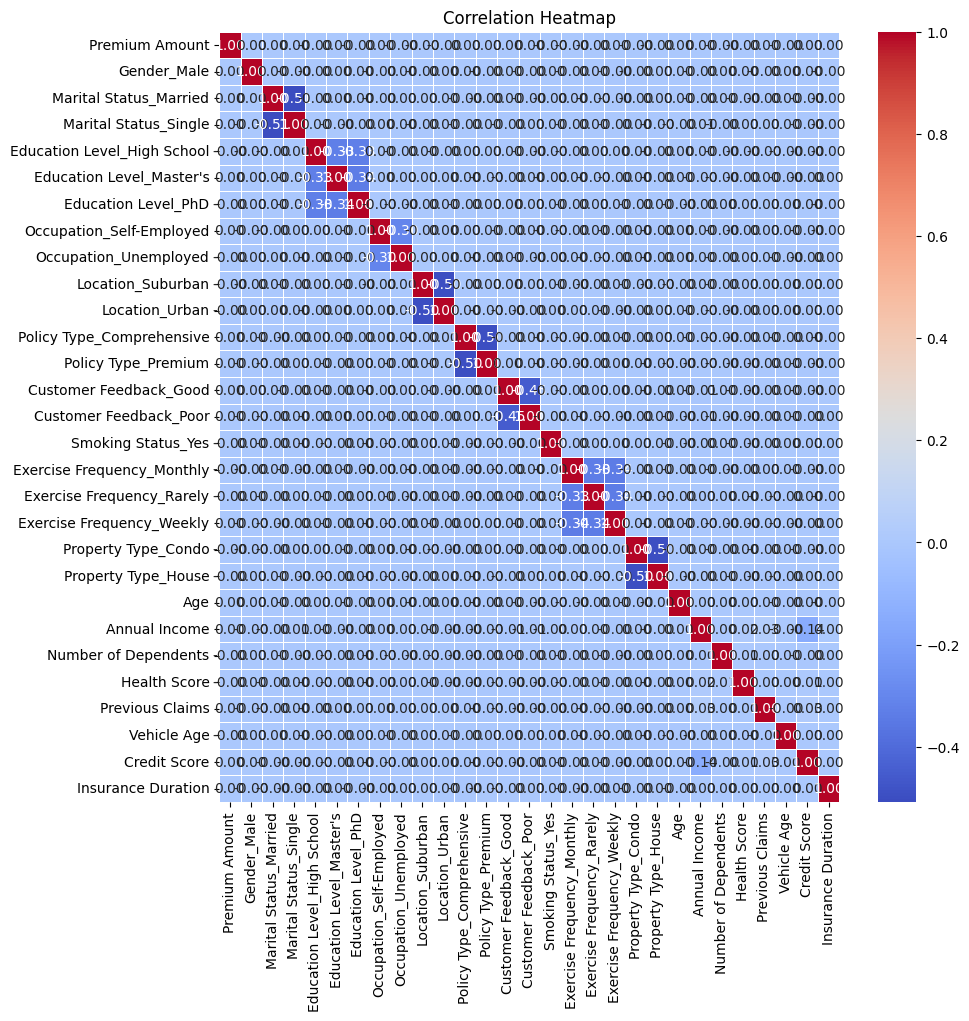

In [20]:
# Compute the correlation matrix
correlation_data = pd.concat([y, OH_train_data], axis=1)

corr_matrix = correlation_data.corr()

# Set the size of the plot
plt.figure(figsize=(10, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [50]:
corrmat = correlation_data.corr()
sorted_corrmat = corrmat.iloc[:, 0].sort_values(ascending=False)
sorted_corrmat

Premium Amount                 1.000000
Education Level_Master's       0.001828
Age                            0.001197
Exercise Frequency_Weekly      0.000984
Policy Type_Comprehensive      0.000940
Customer Feedback_Good         0.000856
Occupation_Self-Employed       0.000816
Marital Status_Single          0.000808
Credit Score                   0.000763
Insurance Duration             0.000620
Gender_Male                    0.000507
Policy Type_Premium            0.000384
Annual Income                  0.000217
Customer Feedback_Poor         0.000186
Marital Status_Married         0.000143
Previous Claims                0.000034
Education Level_High School   -0.000167
Location_Suburban             -0.000216
Property Type_House           -0.000225
Number of Dependents          -0.000239
Occupation_Unemployed         -0.000307
Exercise Frequency_Rarely     -0.000355
Property Type_Condo           -0.000450
Exercise Frequency_Monthly    -0.000539
Education Level_PhD           -0.000813


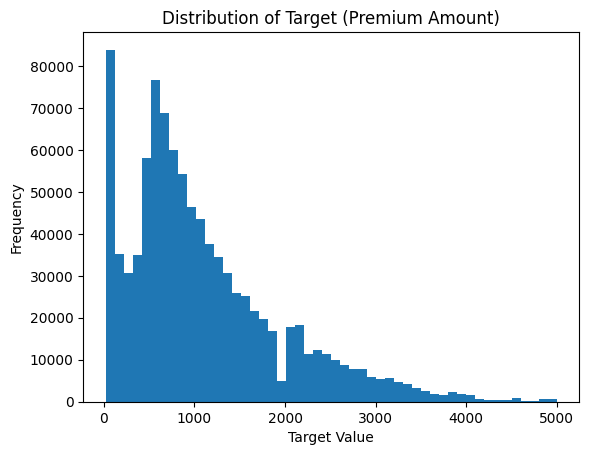

In [52]:
plt.hist(y_train, bins=50)
plt.title("Distribution of Target (Premium Amount)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

We see that nome of the feature variables are highly correlated to each other, we can, therefore, consider them in our model.

In [ ]:
#showing skewness

plt.figure(figsize=(8,6))
sns.histplot(y_train, kde=True, color='blue', bins=25)
plt.title('Distribution and Skewness of Target')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show

skew_value = y_train.skew()
print(f'Skewness of the target variable: {skew_value}')

In [22]:
# Creating the model using Random Forest

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

score_dataset(OH_train_data, OH_valid_data, y_train, y_valid)

669.8932604166664

In [53]:
# Creating the model using RMSE

y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

# initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(OH_train_data, y_train_log)

# make predictions on the training and validation data
y_train_pred_log = model.predict(OH_train_data)
y_valid_pred_log = model.predict(OH_valid_data)

# reverse the log transformation to return predictions to their original scale
y_train_pred = np.expm1(y_train_pred_log)
y_valid_pred = np.expm1(y_valid_pred_log)

# custom RMSLE function
def rmsle(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.clip(np.array(y_pred), 0, None)
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    squared_diff = (log_y_true - log_y_pred) ** 2
    mean_squared_error = np.mean(squared_diff)
    return np.sqrt(mean_squared_error)

# compute RMSLE for training and validation data
train_rmsle = rmsle(y_train, y_train_pred)
valid_rmsle = rmsle(y_valid, y_valid_pred)

# output the results
print(f"RMSLE for training data: {train_rmsle:.4f}")
print(f"RMSLE for validation data: {valid_rmsle:.4f}")

# Feature importance analysis
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(OH_train_data.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


RMSLE for training data: 0.3999
RMSLE for validation data: 1.0887
Feature Importances:
Gender_Male: 0.0142
Marital Status_Married: 0.0124
Marital Status_Single: 0.0125
Education Level_High School: 0.0119
Education Level_Master's: 0.0120
Education Level_PhD: 0.0119
Occupation_Self-Employed: 0.0122
Occupation_Unemployed: 0.0122
Location_Suburban: 0.0123
Location_Urban: 0.0123
Policy Type_Comprehensive: 0.0126
Policy Type_Premium: 0.0125
Customer Feedback_Good: 0.0119
Customer Feedback_Poor: 0.0120
Smoking Status_Yes: 0.0141
Exercise Frequency_Monthly: 0.0118
Exercise Frequency_Rarely: 0.0118
Exercise Frequency_Weekly: 0.0120
Property Type_Condo: 0.0127
Property Type_House: 0.0126
Age: 0.0989
Annual Income: 0.1561
Number of Dependents: 0.0393
Health Score: 0.1600
Previous Claims: 0.0302
Vehicle Age: 0.0791
Credit Score: 0.1316
Insurance Duration: 0.0569


This might hint at overfitting as the value for the validation data is higher than the value for training data.

In [46]:
OH_train_data.head()
y_train.head()

id
137672    2220.0
786837    1281.0
559710     456.0
127788    1383.0
244109     545.0
Name: Premium Amount, dtype: float64

In [56]:
#Using K-fold cross validation

def rmsle_scorer(y_true, y_pred):
    """Custom scorer to compute negative RMSLE for compatibility with cross_val_score."""
    y_true = np.array(y_true)
    y_pred = np.clip(np.array(y_pred), 0, None)  # ensure no negative predictions
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    squared_diff = (log_y_true - log_y_pred) ** 2
    mean_squared_error = np.mean(squared_diff)
    return -np.sqrt(mean_squared_error)  # Return negative for compatibility with scoring

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Set up K-fold cross-validation
num_folds = 2
kf_model = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# log-transform the target variable
y_train_log = np.log1p(y_train)

# custom RMSLE scorer
scorer = make_scorer(rmsle_scorer, greater_is_better=False)

# cross-validation with custom RMSLE scorer
scores = cross_val_score(model, OH_train_data, y_train_log, cv=kf_model, scoring=scorer)

# convert scores back to positive for readability
rmsle_scores = -scores

# RMSLE scores for each fold
print(f"RMSLE for each fold: {rmsle_scores}")

# mean RMSLE score across all folds
print(f"Mean RMSLE: {rmsle_scores.mean()}")

RMSLE for each fold: [-0.16063267 -0.16062961]
Mean RMSLE: -0.1606311436135079


In [62]:
#predictions for test data
test_data_processed = pd.get_dummies(test_data)

# Align test data to match the training data's columns
test_data_processed = test_data_processed.reindex(columns=OH_train_data.columns, fill_value=0)

# Make predictions
test_data_pred = model.predict(test_data_processed)
model.fit(OH_train_data, y_train)

test_data_pred = model.predict(test_data)
test_data_pred = pd.DataFrame(test_data_pred, columns=['Premium Amount'])
test_data_pred.tail()

: 

In [57]:
submission = pd.DataFrame({'id': test_data, 'Premium Amount': test_pred['Premium Amount']})
print(submission.shape)
submission.tail()

(1600000, 2)


,id,Premium Amount
1999995,1999995.0,NaN
1999996,1999996.0,NaN
1999997,1999997.0,NaN
1999998,1999998.0,NaN
1999999,1999999.0,NaN
